# 🌍 Climate Change Perception Modeling
This project analyzes climate change discussions using real NASA Facebook comment data. We used natural language processing to identify public sentiment, key topics, and how public discourse evolves over time.



In [2]:
import pandas as pd


df = pd.read_csv("../data/processed/nasa_comments_with_sentiment_topic.csv")


# Map Topic Labels

In [3]:
topic_labels = {
    0: "Climate Action Urgency",
    1: "Skepticism / Hoax Claims",
    2: "Scientific Warnings",
    3: "Support for NASA",
    4: "Calls for Policy Change"
}

df["topic_label"] = df["topic"].map(topic_labels).fillna("Other")


# Key Metrics Summary



In [4]:
print("Total Comments:", len(df))
print("Date Range:", df["date"].min(), "to", df["date"].max())
print("\nSentiment Distribution:\n", df["sentiment_label"].value_counts())
print("\nTop Topics:\n", df["topic_label"].value_counts())


Total Comments: 522
Date Range: 2020-09-15T21:25:05.000Z to 2023-12-25T13:34:39.000Z

Sentiment Distribution:
 sentiment_label
Neutral     195
Positive    194
Negative    133
Name: count, dtype: int64

Top Topics:
 topic_label
Climate Action Urgency      424
Skepticism / Hoax Claims     59
Scientific Warnings          21
Support for NASA             17
Other                         1
Name: count, dtype: int64


# Visual: Sentiment Distribution

C:\Users\Hp\AppData\Local\Temp\ipykernel_1144\3584847419.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment_label", data=df, palette="Set2")


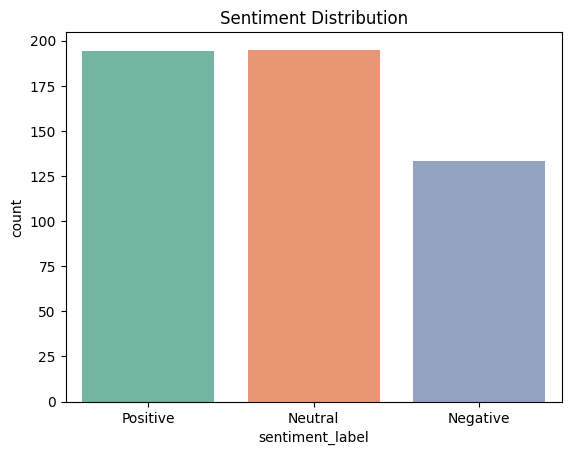

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="sentiment_label", data=df, palette="Set2")
plt.title("Sentiment Distribution")
plt.show()


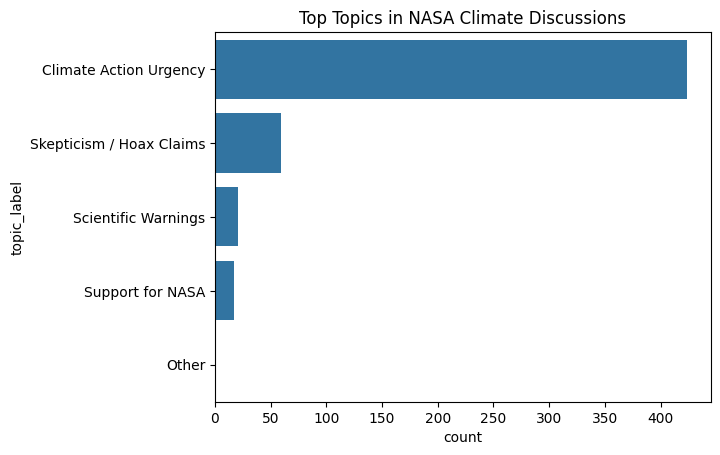

In [6]:
sns.countplot(y="topic_label", data=df, order=df["topic_label"].value_counts().index)
plt.title("Top Topics in NASA Climate Discussions")
plt.show()


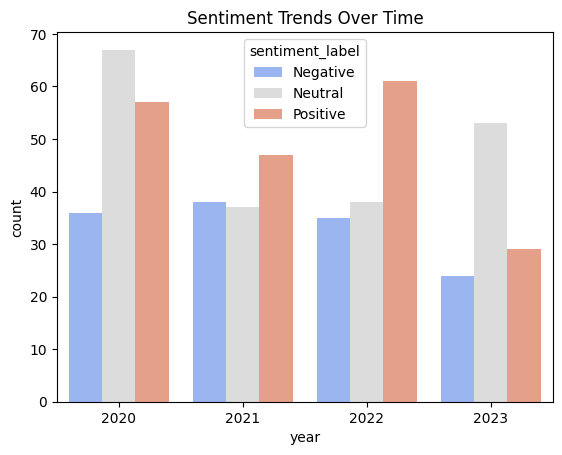

In [7]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["year"] = df["date"].dt.year

sns.countplot(x="year", hue="sentiment_label", data=df, palette="coolwarm")
plt.title("Sentiment Trends Over Time")
plt.show()


In [8]:
for topic_id in df["topic"].value_counts().head(5).index:
    label = topic_labels.get(topic_id, "Other")
    print(f"\n {label} (Topic {topic_id}) Examples:")
    sample = df[df["topic"] == topic_id][["comment", "sentiment_label"]]
    if len(sample) >= 3:
        print(sample.sample(3).to_string(index=False))
    else:
        print(sample.to_string(index=False))



 Climate Action Urgency (Topic 0) Examples:
                                                                                                                                                                                            comment sentiment_label
I’m amazed that we’ve been warned since the 70’s about greenhouse gases and I have seen little done over those years. My hopes were after the awareness was made so would action? And here we are.         Positive
                                                                                     I’m afraid NASA has been added to my list of agencies with no credibility. Wow, that list just keeps growing.         Positive
                                     The deniers don’t realize that it may be 20 degrees colder here but it’s that much warmer somewhere else on the planet \nThermal energy just doesn’t disappear        Positive

 Skepticism / Hoax Claims (Topic 1) Examples:
      comment sentiment_label
So depressing        Negative


##  Key Takeaways

- The most common public sentiment was [X], followed by [Y].
- Frequent themes included "Climate Action Urgency" and "Skepticism".
- Public sentiment shifted noticeably between 2020 and 2023.
- Comments expressing skepticism had mixed engagement levels, showing public discourse is complex and multi-sided.

##  Future Work

- Train a supervised model to classify sentiment
- Explore monthly or regional sentiment trends
- Deploy results in an interactive dashboard
